In [ ]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [ ]:
data = pd.read_csv('/content/creditcard.csv')

In [ ]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
data.shape

(118921, 31)

In [ ]:
data = data.sample(frac = 0.2, random_state = 1)
print(data.shape)

(23784, 31)


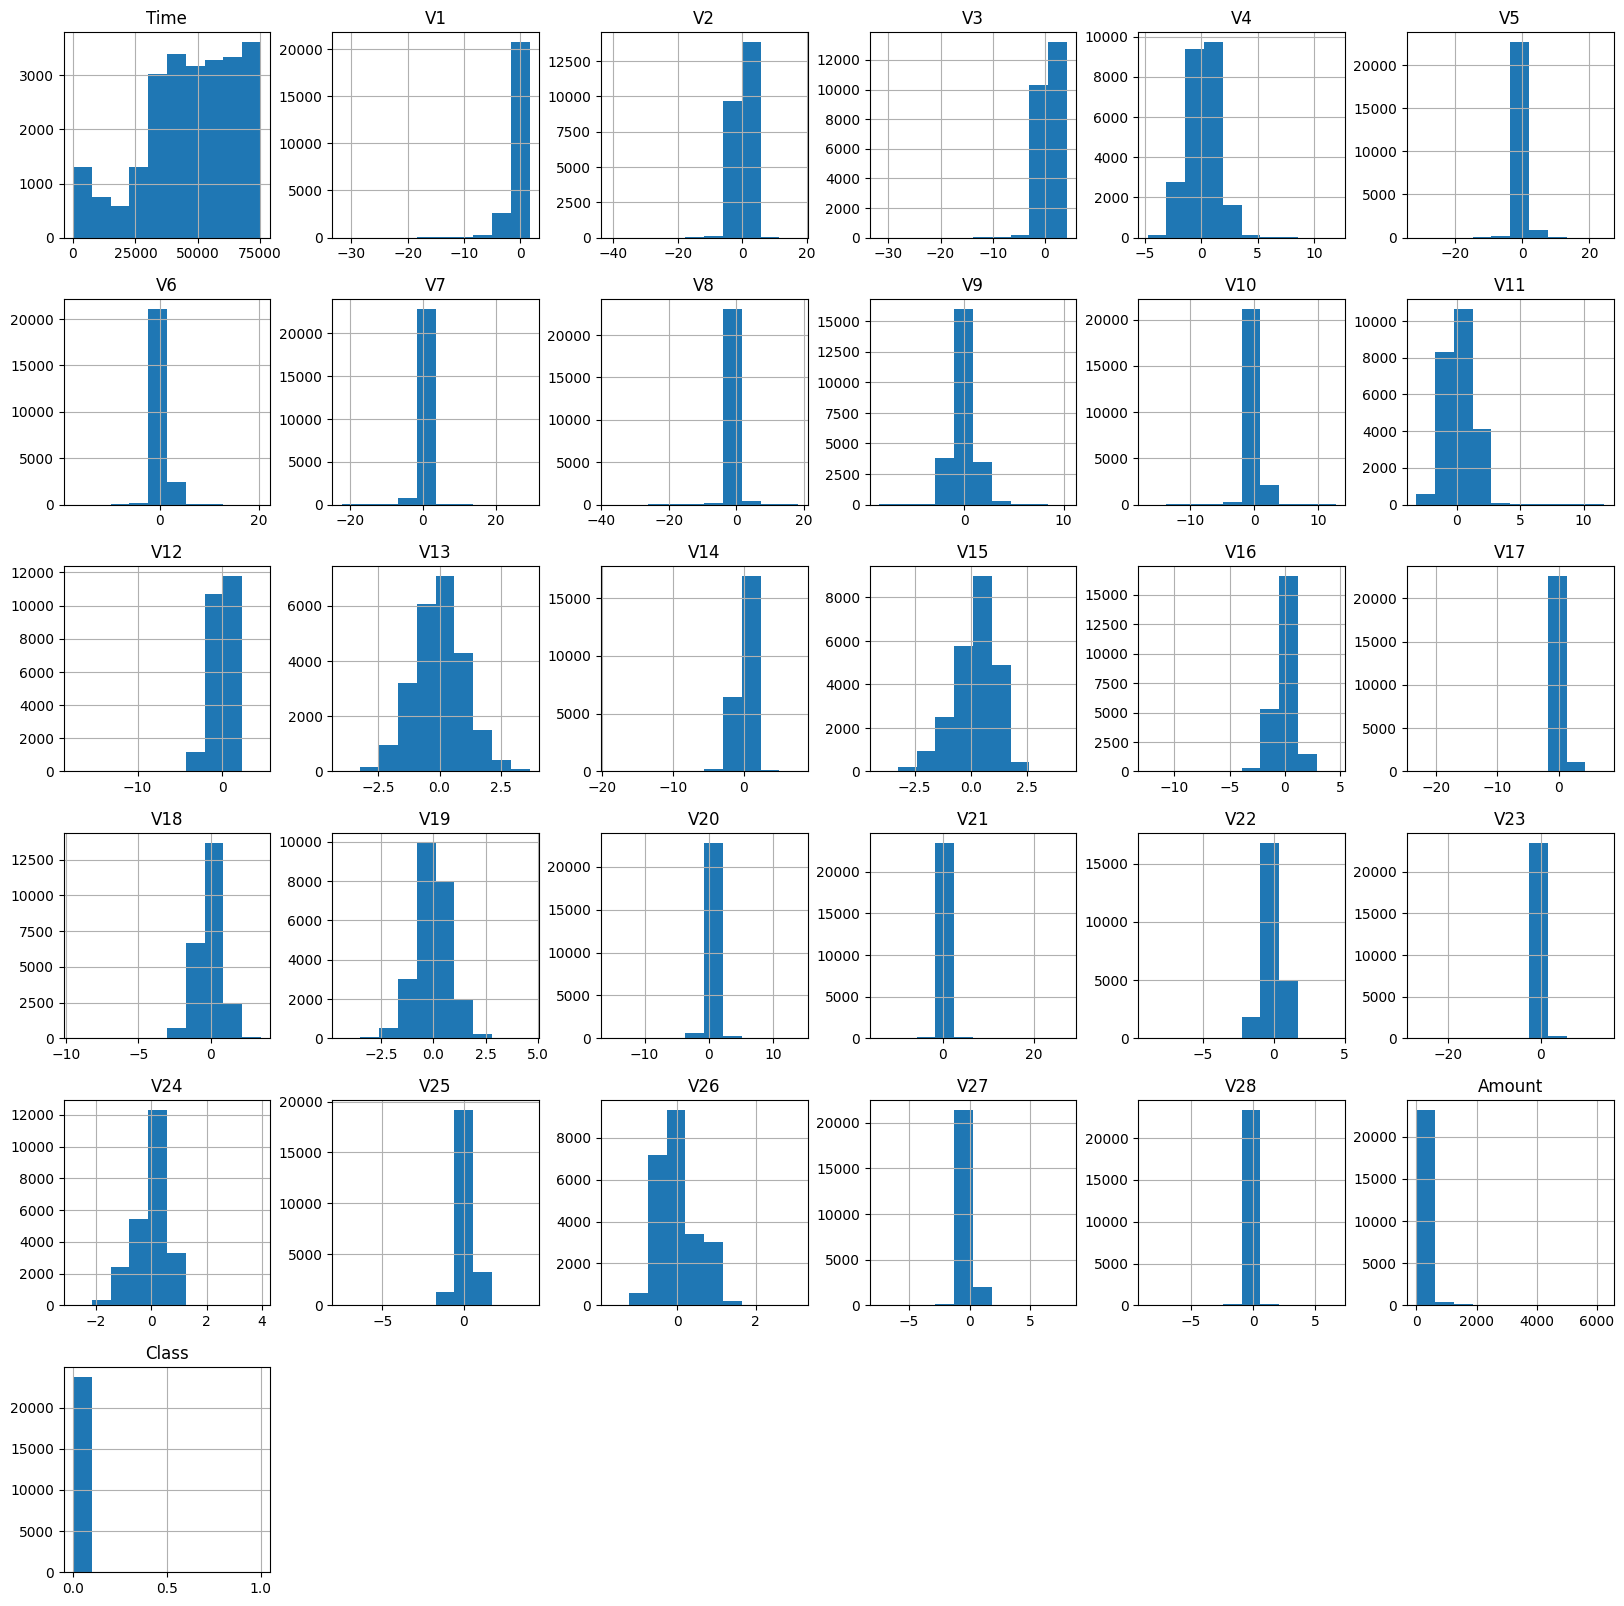

In [ ]:
data.hist(figsize = (20, 20))
plt.show()



In [ ]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]



print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))
#checking the fraud cases and valid cases

Fraud Cases: 48
Valid Cases: 23736


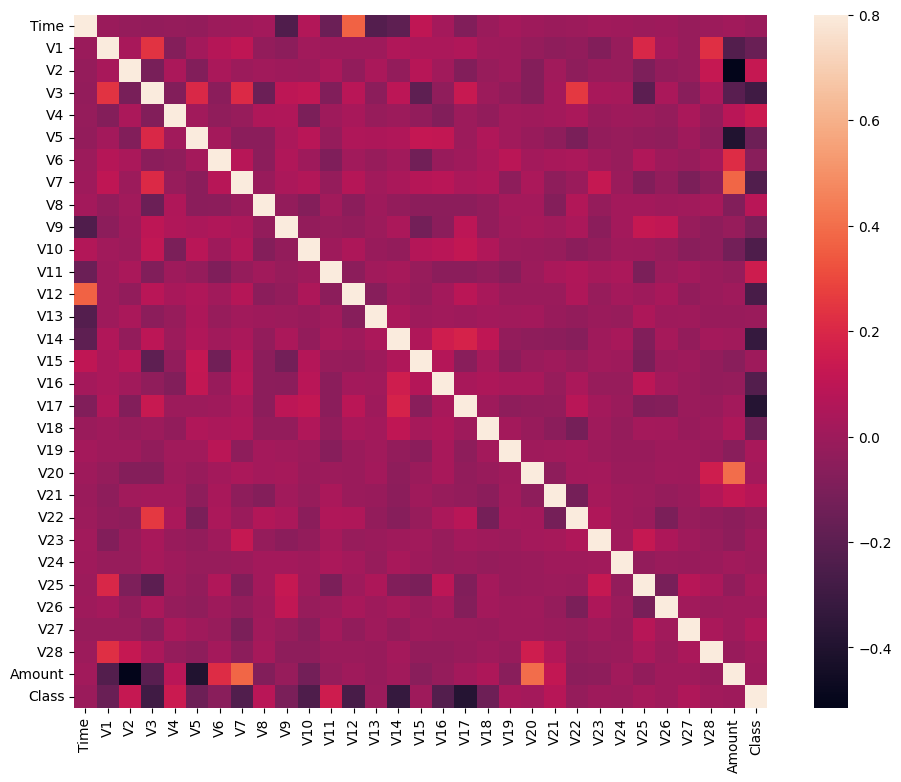

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
columns = data.columns.tolist()

# filter the columns to remove the data we do not want
columns = [c for c in columns if c not in ['Class']]

# store the variable we will be predicting on which is class
target = 'Class'

# X includes everything except our class column
X = data[columns]
# Y includes all the class labels for each sample
# this is also one-dimensional
Y = data[target]

# print the shapes of X and Y
print(X.shape)
print(Y.shape)

(23784, 30)
(23784,)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
#APPLYING ISOLATION FOREST
#ACCURACY:99.61%

In [ ]:
state = 1
outlier_fraction = 0.01

# define the outlier detection methods
classifiers = {
    'Isolation Forest': IsolationForest(max_samples = len(X),contamination = outlier_fraction,random_state = state),
    'Local Outlier Factor': LocalOutlierFactor(n_neighbors = 20,contamination = outlier_fraction)
}

In [ ]:
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):

    # fit the data and tag outliers
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)

    # reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != Y).sum()

    # classification matrix
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 222
0.9906659939455096
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     23736
         1.0       0.13      0.67      0.22        48

    accuracy                           0.99     23784
   macro avg       0.57      0.83      0.61     23784
weighted avg       1.00      0.99      0.99     23784

Local Outlier Factor: 282
0.9881432896064581
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     23736
         1.0       0.01      0.04      0.01        48

    accuracy                           0.99     23784
   macro avg       0.50      0.52      0.50     23784
weighted avg       1.00      0.99      0.99     23784



In [ ]:
#RANDOM FOREST
#ACCURACY

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("RANDOM FOREST Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


RANDOM FOREST Accuracy: 0.9995795669539626
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4748
         1.0       1.00      0.78      0.88         9

    accuracy                           1.00      4757
   macro avg       1.00      0.89      0.94      4757
weighted avg       1.00      1.00      1.00      4757



In [ ]:
#decision tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9989489173849064
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4748
         1.0       0.83      0.56      0.67         9

    accuracy                           1.00      4757
   macro avg       0.92      0.78      0.83      4757
weighted avg       1.00      1.00      1.00      4757



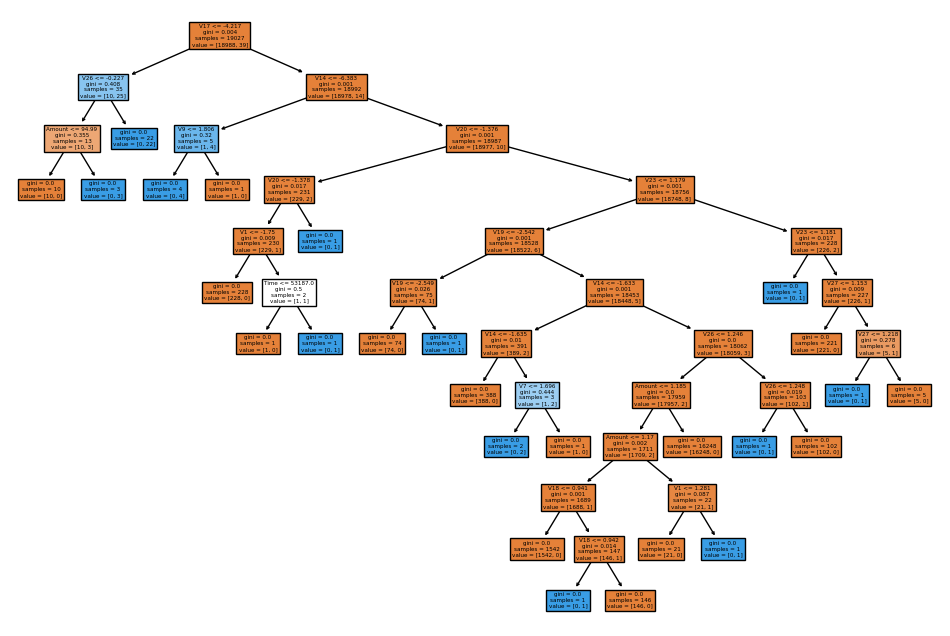

Decision Tree: 5
0.9989489173849064
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4748
         1.0       0.83      0.56      0.67         9

    accuracy                           1.00      4757
   macro avg       0.92      0.78      0.83      4757
weighted avg       1.00      1.00      1.00      4757



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=list(X.columns))
plt.show()

# Make predictions on the test set
y_pred = clf.predict(X_test)

n_errors = (y_pred != y_test).sum()

# Classification matrix
print('Decision Tree: {}'.format(n_errors))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Logistic Regression Classifier with increased max_iter
clf = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9987387008618878
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4748
         1.0       0.80      0.44      0.57         9

    accuracy                           1.00      4757
   macro avg       0.90      0.72      0.79      4757
weighted avg       1.00      1.00      1.00      4757



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Logistic Regression Classifier with increased max_iter
clf = LogisticRegression(random_state=42, max_iter=1000)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
n_errors = (y_pred != y_test).sum()

print(f'Logistic Regression: {n_errors}')
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Logistic Regression: 6
Accuracy: 0.9987387008618878
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4748
         1.0       0.80      0.44      0.57         9

    accuracy                           1.00      4757
   macro avg       0.90      0.72      0.79      4757
weighted avg       1.00      1.00      1.00      4757



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an SVM Classifier
clf = SVC(kernel='rbf', random_state=42)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)

print(f'SVM Classifier Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred, zero_division=1))


SVM Classifier Accuracy: 0.9981080512928316
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4748
         1.0       1.00      0.00      0.00         9

    accuracy                           1.00      4757
   macro avg       1.00      0.50      0.50      4757
weighted avg       1.00      1.00      1.00      4757



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=42)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
n_errors = (y_pred != y_test).sum()

print(f'Gradient Boosting Classifier: {n_errors}')
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Gradient Boosting Classifier: 6
Accuracy: 0.9987387008618878
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4748
         1.0       0.71      0.56      0.63         9

    accuracy                           1.00      4757
   macro avg       0.86      0.78      0.81      4757
weighted avg       1.00      1.00      1.00      4757

